In [8]:
import sklearn.datasets
import collections
import matplotlib.pyplot as plt
from numpy import where

In [42]:
# define dataset
X, y = sklearn.datasets.make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, weights=[0.99], flip_y = 0, random_state = 1)

In [10]:
# summarize data distribution
counter = collections.Counter(y)
counter

Counter({0: 9900, 1: 100})

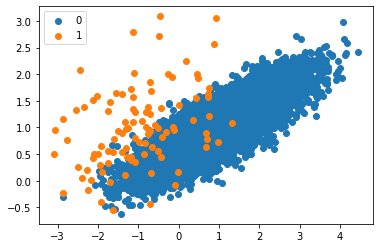

In [11]:
# scatter plot of examples by class labels
for key in counter.keys():
    row_ix = where(y==key)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(key))
plt.legend()
plt.show()

In [12]:
# fit and transform the dataset
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y  = smote.fit_resample(X,y)

In [14]:
counter_after = collections.Counter(y)
counter_after

Counter({0: 9900, 1: 9900})

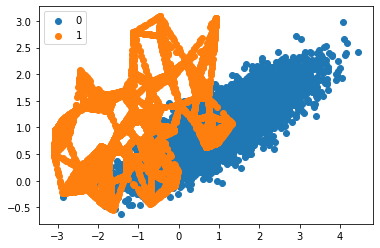

In [26]:
for key in counter_after.keys():
    row_ix = where(y==key)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(key))
plt.legend()
plt.show()

In [45]:
from imblearn.under_sampling import RandomUnderSampler

# define pipeline
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy = 0.1)
under = RandomUnderSampler(sampling_strategy = 0.5)
steps = [('o', over), ('u',under)]
pipeline = Pipeline(steps = steps)

In [46]:
# transform the dataset
X_after, y_after = pipeline.fit_resample(X,y)

In [49]:
# summarize the original class distributione
counter = collections.Counter(y)

# summarize the new class distribution
counter_after = collections.Counter(y_after)

print(counter)
print(counter_after)

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


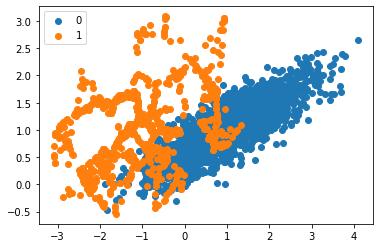

In [51]:
# scatter plot of examples by class label

for label,_ in counter.items():
    row_ix = where(y_after==label)[0]
    plt.scatter(X_after[row_ix, 0], X_after[row_ix, 1], label = str(label))
plt.legend()
plt.show()